# Adatfeldolgozás

## **Felhasznált könyvtárak importálása**

Az elemzéshez az alábbi Python könyvtárakat használtam:

- **Pandas**: A `pandas` könyvtárat az adatok betöltésére, kezelésére és feldolgozására használtam. Ez a könyvtár kiválóan alkalmas táblázatos adatokkal való munkára.
- **NumPy**: Az adatok numerikus feldolgozásához és a számításokhoz használtam a `numpy` könyvtárat.
- **Matplotlib**: Az eredmények vizualizálásához, például grafikonok és diagramok készítéséhez használtam a `matplotlib` könyvtárat.
- **Seaborn**: Az eredmények vizualizálásához használtam, de ez a könyvtár már komolyabb szintű vizualizálást tett lehetőve

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Adatok betöltése**

Az elemzés során két CSV fájlt töltöttem be a Pandas `read_csv()` függvényével:

- **gazdmut.csv**: Ez a fájl a cégek adatait tartalmazza, például a cég azonosítóját (`azon`), a cég méretét (`meret`), és a tevékenységi kör kategóriáját (`teaor_kat`).
- **szamla.csv**: Ez a fájl a számlák adatait tartalmazza, beleértve a számla azonosítóját (`szamla_azon`), a cég azonosítóját (`ceg_azon`), a számla összegét (`brutto_huf`), és a szolgáltatás kategóriáját (`szolgaltatas_kat`).


In [16]:
cegek = pd.read_csv('gazdmut.csv',skiprows=1,names=['azon', 'meret', 'teaor_kat'])
szamlak = pd.read_csv('szamla.csv',skiprows=1,names=['szamla_azon', 'ceg_azon', 'brutto_huf','szolgaltatas_kat'])

## **Táblák összekapcsolása**

A `szamla.csv` és `gazdmut.csv` fájlok összekapcsolásához a Pandas `merge()` függvényét használtam. Az összekapcsolás a `ceg_azon` (a számlákban szereplő cég azonosító) és az `azon` (a cégek táblájában szereplő cég azonosító) mezők alapján történt. Az `inner` kapcsolódási típus biztosítja, hogy csak azok a sorok maradjanak meg, ahol mindkét táblában található egyezés.


In [17]:
#táblák összekapcsolása
df = pd.merge(
    szamlak,
    cegek,
    left_on='ceg_azon',
    right_on='azon',
    how='inner'
)

## **Adatok megtekintése**

Az adatkeret első néhány sorának megtekintéséhez a `head()` függvényt használtam. Ez segít abban, hogy gyorsan ellenőrizzem az összekapcsolt adatokat és megbizonyosodjak arról, hogy a táblák megfelelően lettek összevonva.


In [18]:
df.head()

,szamla_azon,ceg_azon,brutto_huf,szolgaltatas_kat,azon,meret,teaor_kat
0,54916,3462,3199.0,egyeb,3462,mikro,kereskedelem + szallitas
1,49736,3462,120720.0,konyvel,3462,mikro,kereskedelem + szallitas
2,64829,3462,3141.0,egyeb,3462,mikro,kereskedelem + szallitas
3,69667,3462,146058.0,konyvel,3462,mikro,kereskedelem + szallitas
4,81657,3462,125433.0,konyvel,3462,mikro,kereskedelem + szallitas


## **Alapvető statisztikai jellemzők**
A `describe()` függvényt használtam az adatkeret numerikus oszlopainak alapvető statisztikai jellemzőinek áttekintésére. Ez tartalmazza például az átlagot, szórást, minimumot, maximumot, valamint a kvantiliseket a számszerű mezőkre vonatkozóan (például `brutto_huf`). A leíró adatok közül csak a `brutto_huf` oszlopot érdemes figyelembe venni, mivel ez folytonos változó, és nem azonosít semmit.


In [21]:
df.describe()

,szamla_azon,ceg_azon,brutto_huf,azon
count,136868.000000,136868.000000,1.368680e+05,136868.000000
mean,54707.055148,5076.929100,1.506287e+05,5076.929100
std,26061.215113,2697.548429,5.200182e+05,2697.548429
min,10000.000000,1000.000000,1.000000e+00,1000.000000
25%,31881.000000,2626.000000,1.270800e+04,2626.000000
50%,54811.000000,4813.000000,3.806000e+04,4813.000000
75%,77187.500000,7490.000000,1.018500e+05,7490.000000
max,99998.000000,9994.000000,3.540600e+07,9994.000000


## **Cégek megoszlása méret szerint**

A cégek méret szerinti eloszlását a `value_counts()` függvénnyel vizsgáltam. Ez megmutatja, hogy az egyes méretkategóriák (pl. mikro, kis, közép, nagy) hány vállalatot tartalmaznak az adatbázisban.


In [20]:
df['meret'].value_counts()

meret
mikro               71849
kis                 49355
kozep 100 alatt      7829
kozep 100 felett     4077
nagy                 3758
Name: count, dtype: int64

## **TEÁOR kategóriák százalékos eloszlása**

A vállalatok tevékenységi köreinek (TEÁOR kategóriák) arányát megvizsgáltam százalékosan. Ehhez a `value_counts()` függvény `normalize=True` paraméterét használtam, amely az előfordulások arányát adja vissza. A kapott arányokat 100-zal szoroztam, majd két tizedesjegyre kerekítettem.


In [34]:
df['teaor_kat'].value_counts(normalize=True).mul(100).round(2)

teaor_kat
kereskedelem + szallitas         33.99
tobbi szolgaltatas               33.32
epitoipar                        10.60
tobbi ipar                        9.37
szallashely + vendeglatas         7.27
mezogazdasag + elelmiszeripar     3.67
energiaszektor + banya            1.78
Name: proportion, dtype: float64

## **Átlagos költés vállalati méret szerint**

A cégek átlagos költését méretenként a `groupby()` és `mean()` függvények segítségével számítottam ki. Ez lehetőséget adott arra, hogy összehasonlítsam a különböző méretű vállalkozások különböző szolgáltatásokra fordított átlagos kiadásait.


In [23]:
atlag_koltes = df.groupby('meret')['brutto_huf'].mean()
print(atlag_koltes)

meret
kis                 218049.215318
kozep 100 alatt     442715.612211
kozep 100 felett    431701.708364
mikro                46795.675486
nagy                336918.292177
Name: brutto_huf, dtype: float64


## **Szolgáltatáskategóriák gyakorisága vállalati méret szerint**

A `groupby()` és `size()` függvények segítségével kiszámoltam, hogy egyes szolgáltatáskategóriák milyen gyakorisággal fordulnak elő a különböző méretű vállalatok esetében. Az `unstack()` metódussal a kategóriákat oszlopokká alakítottam, így könnyebben áttekinthető táblázatos formát kaptam.


In [35]:
# Cégméret és szolgáltatáskategória szerinti gyakoriságok
kategoriak_meret_szerint = df.groupby(['meret', 'szolgaltatas_kat']).size().unstack()

# Eredmény megjelenítése
print(kategoriak_meret_szerint)

szolgaltatas_kat  alt_szoft   egyeb  jovedek  konyvel  n_szoft   szek    vam
meret                                                                       
kis                  1307.0  4368.0    223.0  38735.0   3663.0  257.0  802.0
kozep 100 alatt       287.0   866.0      NaN   5844.0    744.0   72.0   16.0
kozep 100 felett       76.0   499.0      NaN   2160.0    515.0    1.0  826.0
mikro                1893.0  4538.0     64.0  58078.0   6360.0  621.0  295.0
nagy                    5.0   243.0     59.0   2346.0    411.0  121.0  573.0


## **Cégenkénti bruttó költés szolgáltatáskategóriák szerint**

A `groupby()` és `sum()` függvényekkel kiszámoltam, hogy az egyes cégek mennyit költöttek különböző szolgáltatáskategóriákra. Az `unstack()` segítségével az adatokat táblázatos formára hoztam, ahol minden sor egy cég, az oszlopok pedig a szolgáltatáskategóriák.


In [36]:
# Cégazonosító és szolgáltatáskategória szerinti bruttó HUF összegzése
brutto_osszeg = df.groupby(['ceg_azon', 'szolgaltatas_kat'])['brutto_huf'].sum().unstack(fill_value=0)

# Eredmény megjelenítése
print(brutto_osszeg)

szolgaltatas_kat  alt_szoft     egyeb  jovedek     konyvel   n_szoft  \
ceg_azon                                                               
1000                    0.0       0.0      0.0  67666625.0   82623.0   
1030                    0.0       0.0      0.0   1661212.0   80745.0   
1034                    0.0       0.0      0.0  22956305.0       0.0   
1040                    0.0  382983.0      0.0         0.0       0.0   
1044                    0.0  202885.0      0.0         0.0       0.0   
...                     ...       ...      ...         ...       ...   
9977                    0.0       0.0      0.0    504187.0       0.0   
9979                    0.0  249164.0      0.0   4606902.0       0.0   
9982                    0.0  294778.0      0.0   4193480.0  389480.0   
9993                    0.0       0.0      0.0   1768790.0       0.0   
9994                    0.0       0.0      0.0   2901037.0   40200.0   

szolgaltatas_kat      szek        vam  
ceg_azon               

## **Legnagyobb költő cégek az összesített bruttó érték alapján**

Ebben a lépésben kiszámoltam az egyes cégek teljes bruttó költését az adminisztratív szolgáltatásokra, függetlenül a szolgáltatás kategóriájától. Ezután a legtöbbet költő top 10 cég került kiválasztásra.


In [32]:
# Cégek teljes költésének összegzése (függetlenül a kategóriáktól)
brutto_osszeg_ceg_szerint = df.groupby('ceg_azon')['brutto_huf'].sum()

# Legnagyobb költők cégenként
top_cegek = brutto_osszeg_ceg_szerint.sort_values(ascending=False).head(10)
print(top_cegek)

ceg_azon
2497    5.699556e+09
2704    1.373466e+09
9454    6.162763e+08
8778    5.259832e+08
2905    4.901233e+08
1538    4.822105e+08
1317    3.842946e+08
8876    3.730296e+08
2626    2.324664e+08
2548    2.265575e+08
Name: brutto_huf, dtype: float64


## **Cégek megoszlása méret szerint**

A cégek méret szerinti eloszlásának vizualizálásához oszlopdiagramot használtam. A diagram a különböző méretkategóriákban található cégek számát mutatja. A diagram elkészítéséhez a Seaborn könyvtár `countplot` függvényét használtam, és az adatokat az `df` DataFrame-ből származtattam.


C:\Users\laszl\AppData\Local\Temp\ipykernel_15320\1252684188.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='meret', data=df, palette='Set2')


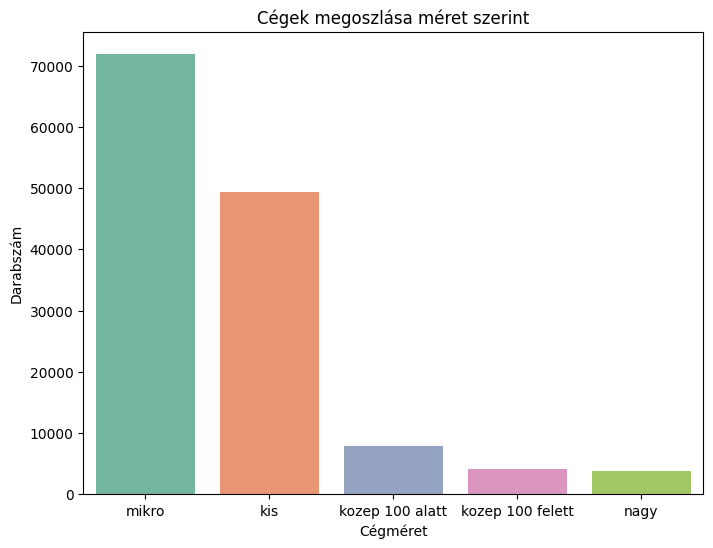

In [47]:
# Cégek megoszlása méret szerint
plt.figure(figsize=(8,6))
sns.countplot(x='meret', data=df, palette='Set2')
plt.title('Cégek megoszlása méret szerint')
plt.xlabel('Cégméret')
plt.ylabel('Darabszám')
plt.show()

## **TEÁOR kategóriák százalékos eloszlása**

A TEÁOR kategóriák százalékos eloszlásának vizualizálásához kördiagramot alkalmaztam. A diagram a különböző TEÁOR kategóriák előfordulási arányait mutatja. A `value_counts` függvény segítségével számoltam ki a kategóriák előfordulási gyakoriságát, majd normalizáltam, hogy százalékos értéket kapjak.


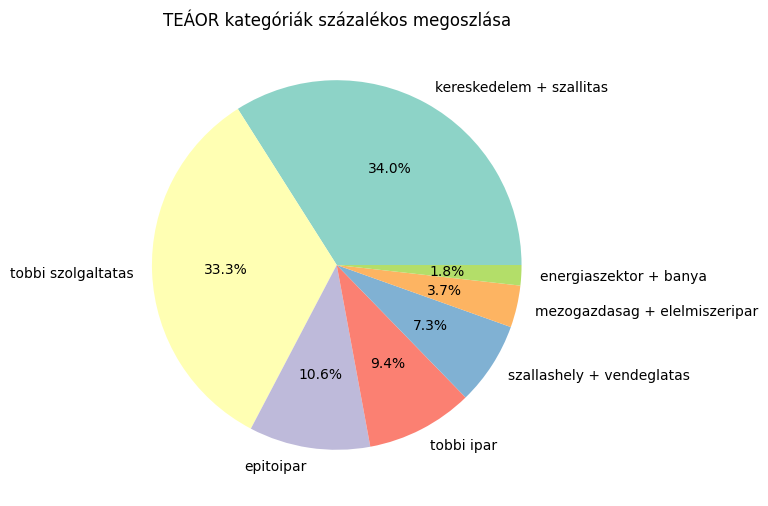

In [51]:
# TEÁOR kategóriák százalékos eloszlása
teaor_counts = df['teaor_kat'].value_counts(normalize=True).mul(100).round(2)
plt.figure(figsize=(8,6))
teaor_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3', len(teaor_counts)), )
plt.title('TEÁOR kategóriák százalékos megoszlása')
plt.ylabel('')
plt.show()

## **Átlagos költés cégenként csökkenő sorrendben**

Az átlagos költés cégenkénti vizualizálásához oszlopdiagramot használtam, amely az egyes cégek átlagos költését mutatja a méretkategóriák szerint, csökkenő sorrendben. A diagram segítségével könnyen megérthetjük, mely cégek költenek a legnagyobb összegeket. A költést az `atlag_koltes` változó tartalmazza, amelyet a `groupby` és `mean`

C:\Users\laszl\AppData\Local\Temp\ipykernel_15320\706171633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=atlag_koltes.sort_values(ascending=False).index,


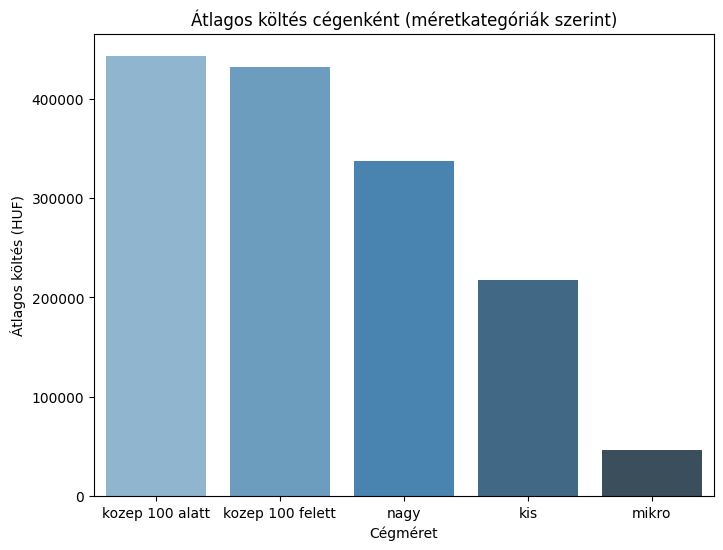

In [48]:
# Átlagos költés cégenként csökkenő sorrendben
plt.figure(figsize=(8,6))
sns.barplot(x=atlag_koltes.sort_values(ascending=False).index, 
            y=atlag_koltes.sort_values(ascending=False).values, 
            palette='Blues_d')
plt.title('Átlagos költés cégenként (méretkategóriák szerint)')
plt.xlabel('Cégméret')
plt.ylabel('Átlagos költés (HUF)')
plt.show()

## **Cégméret és TEÁOR kategóriák kapcsolata**

A cégméret és a TEÁOR kategóriák közötti kapcsolat vizualizálásához hőtérképet (heatmap) használtam. A `pd.crosstab` függvényt alkalmaztam, hogy kiszámoljam a két változó közötti kapcsolatot, majd a Seaborn `heatmap` függvényét használtam a vizualizációhoz. A hőtérkép a cégméret és a TEÁOR kategóriák közötti összefüggést mutatja, ahol az egyes cellák az adott cégméret és TEÁOR kategória közötti előfordulások számát tartalmazzák.

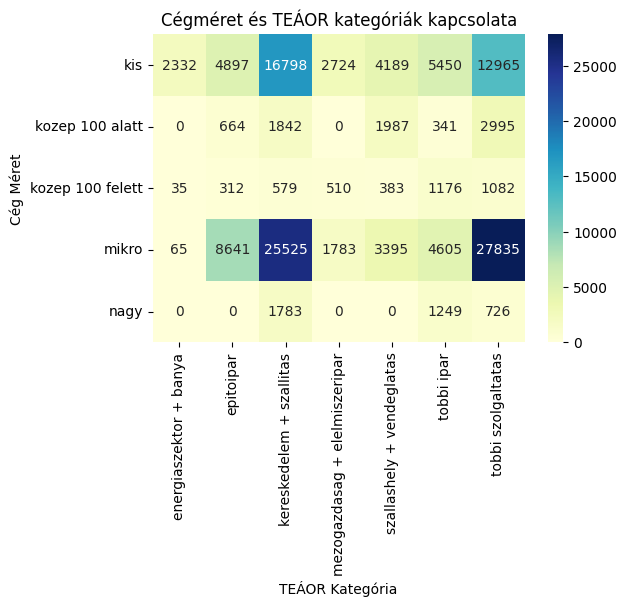

In [49]:
# Cégméret és TEÁOR kategóriák kapcsolata
crosstab = pd.crosstab(df['meret'], df['teaor_kat'])
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Cégméret és TEÁOR kategóriák kapcsolata')
plt.xlabel('TEÁOR Kategória')
plt.ylabel('Cég Méret')
plt.show()

## **Leggyakoribb TEÁOR kategóriák cégméretenként**

A cégméret és a TEÁOR kategóriák kapcsolatának vizualizálásához oszlopdiagramot használtam. A diagram segítségével megfigyelhetjük, hogy különböző cégméretű vállalatok mely TEÁOR kategóriákat használják a leggyakrabban. A kategóriák száma csökkenő sorrendbe van rendezve, hogy könnyen látható legyen, mely kategóriák a legnépszerűbbek. A vizualizáció a `groupby` és `size` függvények segítségével készült, hogy kiszámoljuk a cégméret és TEÁOR kategória közötti előfordulások számát.


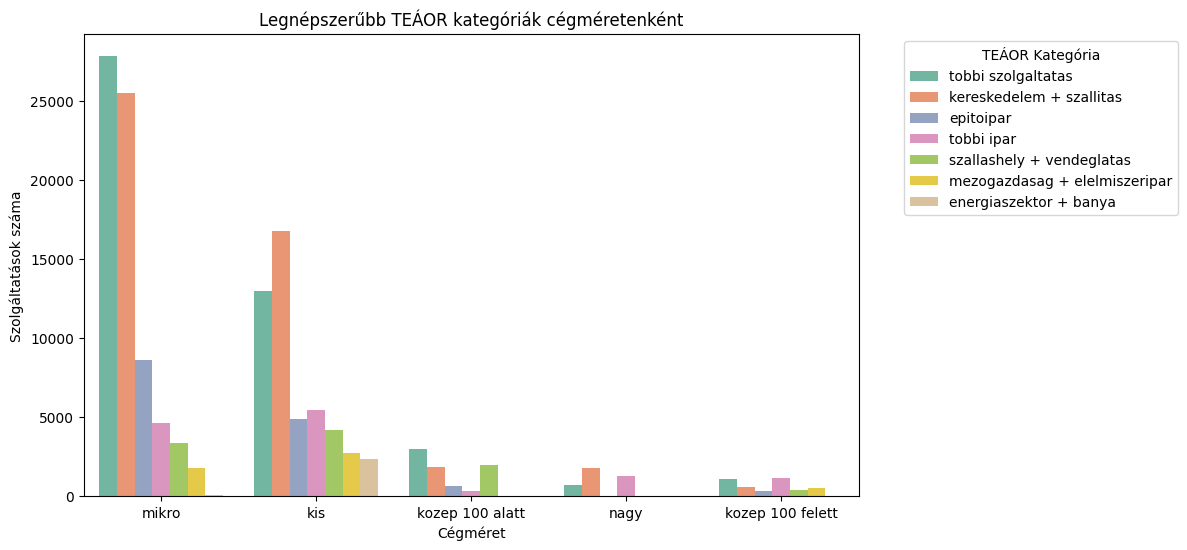

In [55]:
# Cégméret és TEÁOR kategóriák gyakorisága
category_counts = df.groupby(['meret', 'teaor_kat']).size().reset_index(name='count')

# Cégméretenként Leggyakoribb TEÁOR kategóriák csökkenő sorrendben
category_counts = category_counts.sort_values(by='count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='meret', y='count', hue='teaor_kat', data=category_counts, palette='Set2')
plt.title('Legnépszerűbb TEÁOR kategóriák cégméretenként')
plt.xlabel('Cégméret')
plt.ylabel('Szolgáltatások száma')
plt.legend(title='TEÁOR Kategória', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()